In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("F:\capstone files\TxDOT_AADT_Annuals.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40485 entries, 0 to 40484
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          40484 non-null  float64
 1   Y          40484 non-null  float64
 2   OBJECTID   40485 non-null  int64  
 3   ID         40484 non-null  float64
 4   DIST_NM    40484 non-null  object 
 5   CNTY_NM    40484 non-null  object 
 6   T_FLAG     40484 non-null  object 
 7   AADT_2022  40484 non-null  float64
 8   AADT_2021  40484 non-null  float64
 9   AADT_2020  40484 non-null  float64
 10  AADT_2019  40484 non-null  float64
 11  AADT_2018  40484 non-null  float64
 12  AADT_2017  40484 non-null  float64
 13  AADT_2016  40484 non-null  float64
 14  AADT_2015  40484 non-null  float64
 15  AADT_2014  40484 non-null  float64
 16  AADT_2013  40484 non-null  float64
 17  AADT_2012  40484 non-null  float64
 18  AADT_2011  40484 non-null  float64
 19  AADT_2010  40484 non-null  float64
 20  AADT_2

This is the only dataset that shows historical traffic data for all of texas, all other sets focus on less populated areas.

In [10]:
data.value_counts("DIST_NM")

DIST_NM
Houston           2939
Dallas            2562
San Antonio       2230
Lubbock           2212
Tyler             2034
Austin            1972
Waco              1967
Fort Worth        1880
Pharr             1767
Yoakum            1756
Corpus Christi    1709
Paris             1665
Abilene           1545
Lufkin            1480
Bryan             1455
Amarillo          1426
Atlanta           1396
Beaumont          1368
Wichita Falls     1364
Odessa            1161
Brownwood         1060
San Angelo         913
El Paso            882
Laredo             872
Childress          869
Name: count, dtype: int64

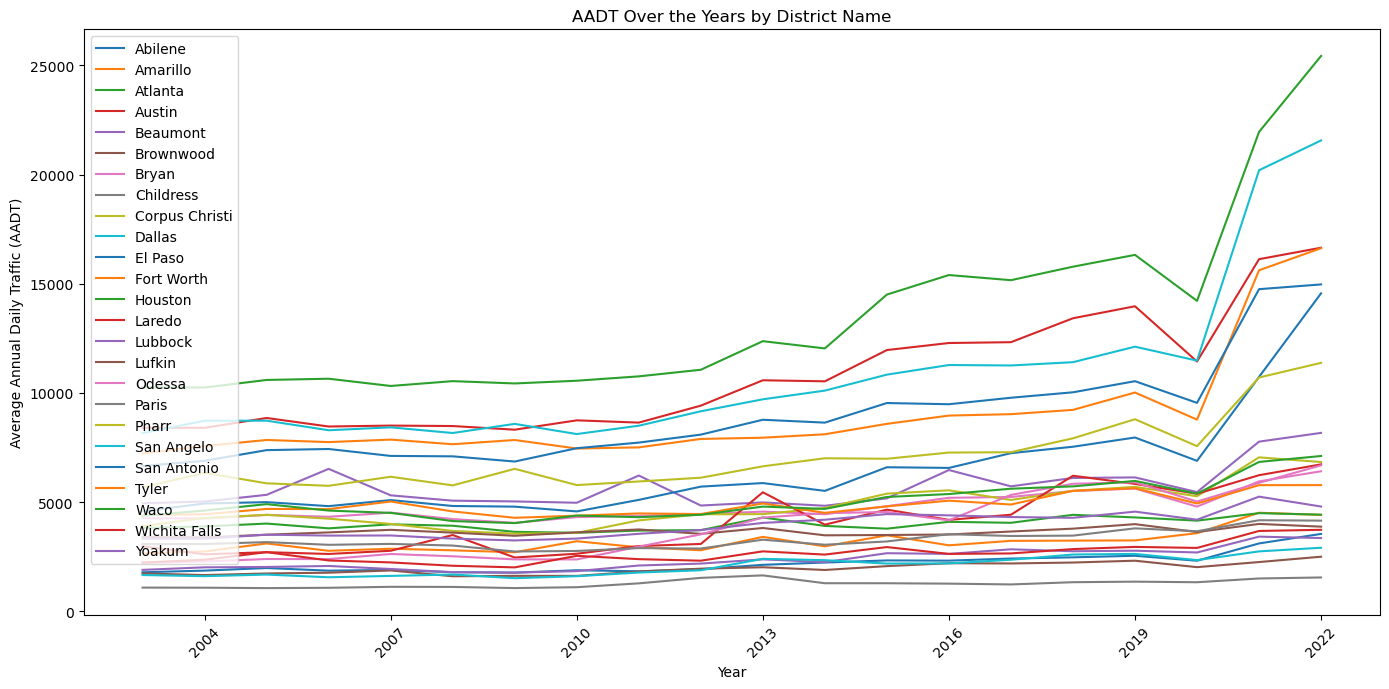

In [17]:
import matplotlib.pyplot as plt

# Extracting year columns and their corresponding AADT values
year_columns = [col for col in data.columns if col.startswith('AADT_')]

# Grouping by district name and calculating the mean AADT for each year
aadts_grouped = data.groupby('DIST_NM')[year_columns].mean().transpose()

# Cleaning up the index to have only the year for plotting
aadts_grouped.index = aadts_grouped.index.str.replace('AADT_', '').astype(int)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
for column in aadts_grouped.columns:
    ax.plot(aadts_grouped.index, aadts_grouped[column], label=column)

ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Daily Traffic (AADT)')
ax.set_title('AADT Over the Years by District Name')
ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As you can see there is a general upward trend in traffic even though there have certainly been traffic projects in these areas since 2003 (COVID-19 caused the dip in 2020).

This dataset (the only one with "comprehensive" data for all of Texas) is disjointed from all other datasets about traffic projects which would require more work for reconciliation than I have time for.

This EDA is nowhere near as comprehensive as it was when I was working on it, this is a reconstruction based on the most relevant information from my initial work that I deleted out of frustration due to my inability to produce results.